### Premier T.A.F 2:Un exemple d'utilisation de SKlearn pour faire une regression lineaire

In [200]:
#on commence par importer les bibliotheques necessaires
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

data1 = pd.read_excel('data.xlsx')
# Standarisation ou normalisation des données
scaler = StandardScaler()
scaler.fit(data1)
Data_scaled = scaler.transform(data1)
data1.iloc[:, 0:-1]=Data_scaled[:, 0:-1]
data1.head()
#data1.iloc[:, 0:-1]=data1.iloc[:, 0:-1]
#data1.head()


,X1,X2,X3,X4,Y
0,-0.629519,-0.987297,1.820488,-0.009519,463.26
1,0.741909,0.681045,1.141863,-0.974621,444.37
2,-1.951297,-1.173018,-0.185078,1.289840,488.56
3,0.162205,0.237203,-0.508393,0.228160,446.48
4,-1.185069,-1.322539,-0.678470,1.596699,473.90


In [202]:
X=data1.iloc[:,[0,1,2,3]]
y=data1.iloc[:,4]
sc = StandardScaler()
X = sc.fit_transform(X)

In [203]:
# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

7654
1914
7654
1914


Text(0, 0.5, 'cost')

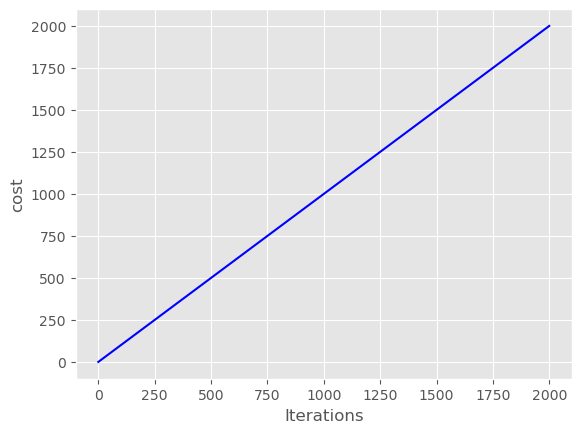

In [226]:
epoch=2000
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(epoch), c='blue')
plt.xlabel('Iterations')
plt.ylabel('cost')

In [142]:
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

1913
7655
1913
7655


### Premier T.A.F 3:Un exemple d'utilisation de SKlearn pour faire L'analyse en composantes principales 

In [236]:
#importons les bibliotheques necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#chargeons les dataset de diabetes depuis sklearn
plt.style.use('ggplot')
data=pd.read_csv('Data.csv')
data.head(3)


,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [290]:
data.shape

(150, 4)

In [325]:
pca = PCA(2)
PC = pca.fit_transform(data)


In [321]:
pca_data = pd.DataFrame(PC,columns = ['PCA1', 'PCA2'])
pca_data.head()

,PCA1,PCA2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


## T.A.F 4:Regression Logistique avec  SKlean

     Actual  Predicted
285      74         70
101      60          0
581      60         70
352      82         68
726      78         70
..      ...        ...
241      70         68
599      38         60
650      54         60
11       74          0
214      82         72

[231 rows x 2 columns]
Confusion Matrix 
 [[7 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy of model
6.926406926406926 %


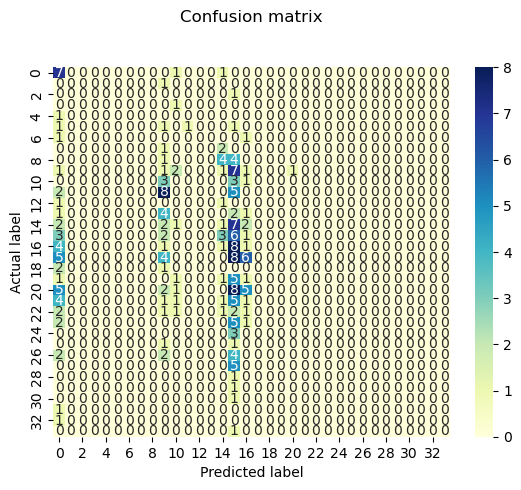

In [2]:
#importation des bibliotheques necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

social_N_data = pd.read_csv('diabetes.csv')
pd.concat([social_N_data.head(), social_N_data.tail()])

#verifions s'il y'a des valeurs manquantes
social_N_data.isnull().any()

# SPLIT DATA TO INDEPENDENT AND DEPENDENT VARIABLES
X = social_N_data.iloc[:,[0,1,3]] # Age, EstimatedSalary and Male
y = social_N_data.iloc[:, 2] # Purchased

# FEATURE SCALING
sc = StandardScaler()
X = sc.fit_transform(X)

# SPLIT DATA TO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# instancions la classe LogisticRegression et division les données
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# PREDICTIONS
y_pred = classifier.predict(X_test)
result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
print(result)

# EVALUATE MODEL
# predic_proba()
# print(classifier.predict_proba(X) # uncheck if needed
#confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix \n', cf_matrix)

sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print('Accuracy of model')
print(accuracy_score(y_test,y_pred) * 100, '%')